In [8]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lec5_graphs as afx
import seaborn as sns

warnings.simplefilter('ignore')
plt.rcParams['figure.figsize'] = (20,12)
plt.style.use('seaborn')

In [2]:
df = pd.read_csv('winequality_merged.csv').drop(columns='Unnamed: 0')

In [3]:
rows = 4 ; cols = df.shape[1]/rows

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
fixed.acidity           6497 non-null float64
volatile.acidity        6497 non-null float64
citric.acid             6497 non-null float64
residual.sugar          6497 non-null float64
chlorides               6497 non-null float64
free.sulfur.dioxide     6497 non-null float64
total.sulfur.dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


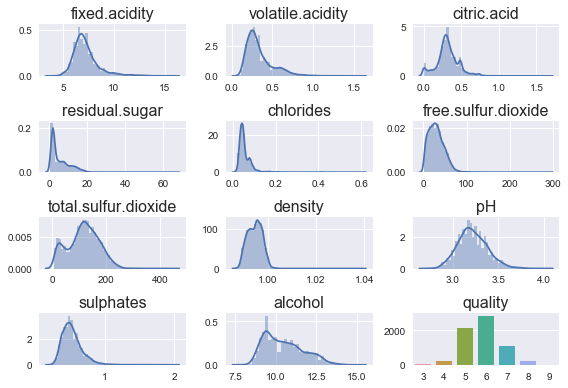

In [9]:
for index , (colname,serie) in enumerate(df.iteritems()):
    plt.subplot(rows,cols, index+1)
    if pd.api.types.is_float_dtype(serie) is True:
        sns.distplot(serie)
    elif pd.api.types.is_integer_dtype(serie) is True:
        sns.countplot(serie)
    plt.title(colname, fontsize=16)
    plt.xlabel(''); plt.ylabel('');plt.tight_layout()

In [12]:
df['quality_bin'] = np.where(df['quality'] > np.mean(df['quality']),1,0)
df['quality_bin'].value_counts('%').round(3)

1    0.633
0    0.367
Name: quality_bin, dtype: float64

In [13]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [14]:
df = df.drop(columns='quality')

In [17]:
X_train , X_test , y_train , y_test = train_test_split(df.loc[:,'fixed.acidity':'alcohol'],
                                                      df['quality_bin'],test_size=.33,
                                                      random_state=11238)

In [18]:
X_train.shape[0] / df.shape[0]

0.6698476219793751

In [19]:
#X_std = StandardScaler.fit_transform(X_train)

In [20]:
wine_scv= Pipeline(
    [
        ('scaler',StandardScaler()),
        ('svc',SVC(kernel='linear'))
                
    ])

In [21]:
wine_scv.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [22]:
y_hat = wine_scv.predict(X_test)

In [58]:
X_test

array([[-0.55179227, -0.48392759, -0.26587363, ..., -0.23947061,
        -0.81500554, -0.41237012],
       [-0.62893288, -0.66616126,  0.21586609, ..., -0.23947061,
        -0.88221236,  0.42611996],
       [-0.78321411, -1.09137315,  1.52344533, ...,  0.07152334,
        -1.08383282, -1.3347092 ],
       ...,
       [-0.01180796,  0.60947444, -0.26587363, ..., -0.05287424,
        -1.08383282,  0.67766698],
       [-0.32037042, -0.6054167 ,  0.21586609, ...,  0.44471609,
         0.12588995,  0.00687492],
       [ 1.76242617, -0.78765037,  1.04170561, ..., -1.98103678,
         0.73075134, -0.83161516]])

In [23]:
y_hat[:10]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [24]:
#preguntar bien la finalziacion del pipeline, pk es mas util y pk el X_test no se standariza

In [25]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.70      0.56      0.62       815
           1       0.76      0.85      0.80      1330

    accuracy                           0.74      2145
   macro avg       0.73      0.71      0.71      2145
weighted avg       0.74      0.74      0.74      2145



In [26]:
#principio de kernelizacion

In [27]:
wine_scv_rbf = Pipeline(
    [
        ('scaler',StandardScaler()),
        ('svc',SVC(kernel='rbf'))
                
    ])

In [28]:
wine_scv_rbf.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [29]:
y_hat_rbf = wine_scv_rbf.predict(X_test)

In [30]:
print(classification_report(y_test,y_hat_rbf))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       815
           1       0.79      0.86      0.82      1330

    accuracy                           0.77      2145
   macro avg       0.76      0.74      0.74      2145
weighted avg       0.76      0.77      0.76      2145



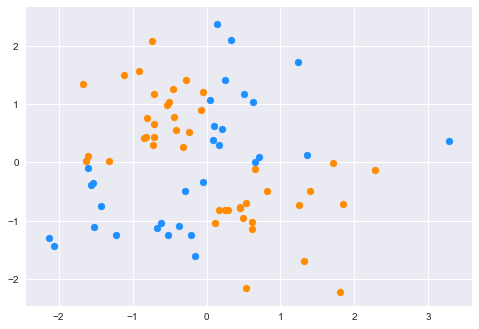

In [31]:
X , y = afx.svm_logical_xor_data(nsize=75)
plt.scatter(X[y==1][:,0], X[y==1][:,1],color='darkorange')
plt.scatter(X[y==-1][:,0], X[y==-1][:,1],color='dodgerblue')

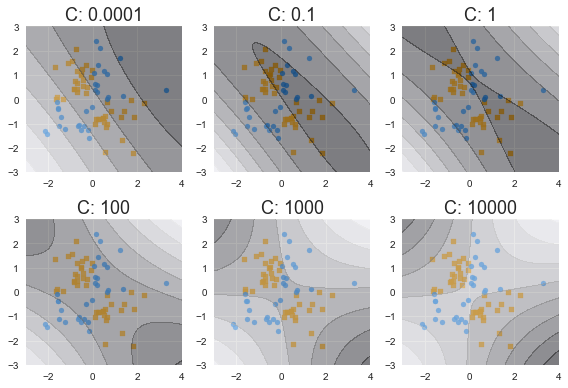

In [32]:
X , y = afx.svm_logical_xor_data(nsize=75)
afx.svm_c_hyperparameter(X,y,c_range=[0.0001,0.1,1,100,1000,10000])

In [34]:
#costo = va asociado al entrenamiento de un modelo, que va a manejar la penalizacion de observaciones clasificadas incorrectas y la estabilizacion de la funcion



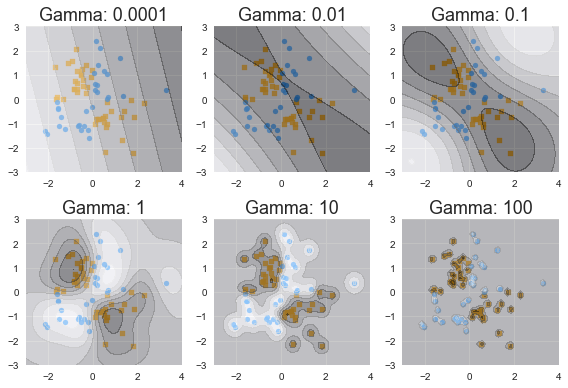

In [38]:
X , y = afx.svm_logical_xor_data(nsize=75)
afx.svm_gamma_hyperparameter(X,y,gamma_range=[0.0001,0.01,0.1,1,10,100])

In [39]:
#busqueda de grilla, para mejorar los param de costo y gama

In [42]:
X_scaled = StandardScaler().fit_transform(df.loc[:,'fixed.acidity':'alcohol'])
X_train , X_test, y_train , y_test  = train_test_split(X_scaled,df['quality_bin'], random_state = 11238,test_size=0.33)

In [50]:
c_param_range=[1,10,100,1000,10000,100000]
gamma_param_range=[0.00001,0.0001,0.001,0.01,0.1,1]
from sklearn.model_selection import cross_val_score

In [51]:
empty_dict = {}
best_score = 0

c_holder = []
for c in c_param_range:
    gamma_holder = []
    for gamma in gamma_param_range:
        tmp_score = cross_val_score(SVC(C=c,gamma=gamma),X_train,y_train,cv=5)
        empty_dict[str("C: {}, Gamma: {}".format(c,gamma))] = list(tmp_score)
        gamma_holder.append(np.mean(tmp_score))
        if np.mean(tmp_score) > best_score:
            best_score = np.mean(tmp_score)
            best_params = str("C: {}, Gamma: {}".format(c,gamma))
    c_holder.append(gamma_holder)
cv_params = np.array(c_holder).reshape(6,6)

In [52]:
best_score

0.770666159272712

In [53]:
cv_params

array([[0.63947617, 0.63947617, 0.71139142, 0.74999867, 0.76952043,
        0.76630838],
       [0.63947617, 0.71253873, 0.7465496 , 0.75895231, 0.77066616,
        0.76332674],
       [0.71276888, 0.74723794, 0.75229541, 0.76285904, 0.76722158,
        0.76171781],
       [0.74700779, 0.74930928, 0.75458739, 0.76078347, 0.75573974,
        0.76171781],
       [0.74655224, 0.75275544, 0.75642384, 0.76491876, 0.74586365,
        0.76171781],
       [0.7497672 , 0.75550799, 0.76492325, 0.7600954 , 0.7444854 ,
        0.76171781]])

In [54]:
best_params

'C: 10, Gamma: 0.1'

Text(0.5, 1.0, 'Best Params: C: 10, Gamma: 0.1')

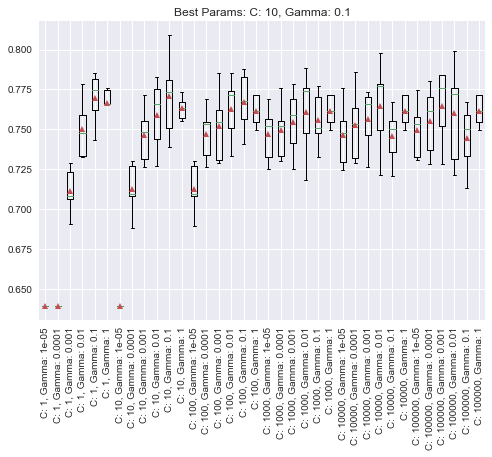

In [55]:
plt.boxplot(empty_dict.values(), showmeans=True)
plt.xticks(range(1,len(empty_dict.keys()) +1),empty_dict.keys(), rotation=90)
plt.title("Best Params: {}".format(best_params))

Text(0.5, 1.0, 'Accuracy Heatmap')

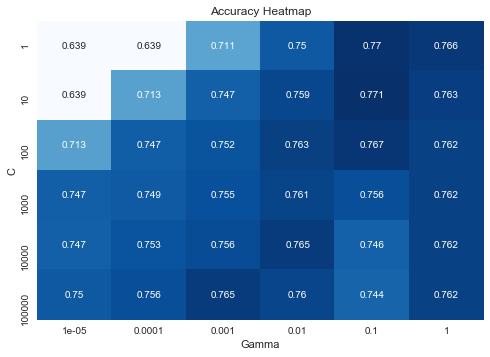

In [56]:
sns.heatmap(cv_params,annot=True,cmap='Blues', cbar=False,xticklabels=gamma_param_range, yticklabels=c_param_range, fmt='.3')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Accuracy Heatmap')

In [59]:
refactor_svc_rbf = Pipeline(
    [
        ('scaler',StandardScaler()),
        ('svc',SVC(kernel='rbf', C=10, gamma=0.1))
                
    ])
refactor_svc_rbf.fit(X_train,y_train)
y_hat = refactor_svc_rbf.predict(X_test)
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70       815
           1       0.81      0.85      0.83      1330

    accuracy                           0.78      2145
   macro avg       0.77      0.76      0.76      2145
weighted avg       0.78      0.78      0.78      2145

